In [14]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [5]:
rdata = '''14.9 1.38 1.05
30.3 2.67 2.37
45.7 3.95 3.66
60.1 5.18 4.93
75.8 6.49 6.26
90.0 7.69 7.49
105.1 8.92 8.76
120.3 10.26 10.02
135.5 11.47 11.25
150.8 12.79 12.61
143.4 12.23 12.03
165.5 13.98 13.81'''

data = np.array([list(map(float, s.split())) for s in rdata.split('\n')])

In [45]:
print('\n'.join(['{} {:.2f} {:.2f}'.format(data[i,0],data[i,1] + 0.01 * data[i,0],data[i,2] + 0.01 * data[i,0]) for i in range(data.shape[0])]))

14.9 1.53 1.20
30.3 2.97 2.67
45.7 4.41 4.12
60.1 5.78 5.53
75.8 7.25 7.02
90.0 8.59 8.39
105.1 9.97 9.81
120.3 11.46 11.22
135.5 12.83 12.61
150.8 14.30 14.12
143.4 13.66 13.46
165.5 15.63 15.46


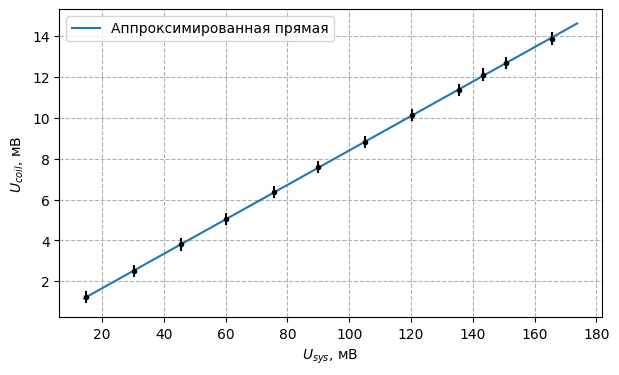

In [54]:
def graph():
    fig = plt.figure(figsize=(7, 4))
    plt.grid(linestyle='--')
    plt.xlabel('$U_{sys}$, мВ')
    plt.ylabel('$U_{coil}$, мВ')
    x = data[::,0]
    y = (data[::,1] + data[::,2]) / 2.0 # + 0.01 * x
    plt.errorbar(x, y, fmt='.k', xerr=0.2, yerr=0.3)
    def MSE(x, y):
        a = (np.sum((x - np.mean(x)) * (y - np.mean(y))))/(np.sum((x - np.mean(x))**2))
        b = np.mean(y) - a * np.mean(x)
        return (a, b)
    k, b = MSE(x, y)
    stretch = np.linspace(np.min(x)*0.95, np.max(x)*1.05, num=100)
    ax, = plt.plot(stretch, stretch * k + b)
    plt.savefig('graph.jpg')
    dk = ((np.sum((y - k * x) ** 2) / (len(x) - 2)) ** 2 * len(x) / (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)) ** 0.5
    return (k, b, dk, dk * np.mean(x ** 2))

k, _, _, _ = graph()

In [57]:
B = k * 143.33 / 45 / pi / pi * 2 / 50 / (14.5e-3) ** 2
print(B * 1.66)
print(k)
print(B)
print(1.05e-34 * 139.68e6 * 2 * pi / B / 927.4e-26 )

8.602977592883171
0.08440960639495426
5.1825166222187775
0.0019173243971598536
